# Example-8 (Confidence interval)

## Install matplotlib

In [1]:
import sys
!{sys.executable} -m pip install matplotlib;

You are using pip version 19.0.2, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Plot function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pycm

def plot_ci(cm,param,alpha=0.05,method="normal-approx"):
    """
    Plot two-sided confidence interval.
    
    :param cm: ConfusionMatrix
    :type cm : pycm.ConfusionMatrix object
    :param param: input parameter
    :type param: str
    :param alpha: type I error
    :type alpha: float
    :param method: binomial confidence intervals method
    :type method: str
    :return: None
    """
    conf_str = str(round(100*(1-alpha)))
    print(conf_str+"%CI :")
    if param in cm.class_stat.keys():
        mean = []
        error = [[],[]]
        data = cm.CI(param,alpha=alpha,binom_method=method)
        class_names_str = list(map(str,(cm.classes)))
        for class_index, class_name in enumerate(cm.classes):
            print(str(class_name)+" : "+str(data[class_name][1]))
            mean.append(cm.class_stat[param][class_name])
            error[0].append(cm.class_stat[param][class_name]-data[class_name][1][0])
            error[1].append(data[class_name][1][1]-cm.class_stat[param][class_name])
        fig = plt.figure()
        plt.errorbar(mean,class_names_str,xerr = error,fmt='o',capsize=5,linestyle="dotted")
        plt.ylabel('Class')
        fig.suptitle("Param :"+param + ", Alpha:"+str(alpha), fontsize=16)
    else:
        mean = cm.overall_stat[param]
        data = cm.CI(param,alpha=alpha,binom_method=method)
        print(data[1])
        error = [[],[]]
        error[0] = [cm.overall_stat[param] - data[1][0]]
        error[1] = [data[1][1] - cm.overall_stat[param]]
        fig = plt.figure()
        plt.errorbar(mean,[param],xerr = error,fmt='o',capsize=5,linestyle="dotted")
        fig.suptitle("Alpha:"+str(alpha), fontsize=16)
        
    plt.show()
            
            

    

In [3]:
cm = pycm.ConfusionMatrix(matrix={0:{0:13,1:2,2:5},1:{0:1,1:10,2:6},2:{0:2,1:0,2:9}})

## TPR

95%CI :
0 : (0.4409588557245249, 0.8590411442754751)
1 : (0.3542806291426003, 0.8221899590926939)
2 : (0.5902508705143656, 1.0461127658492708)


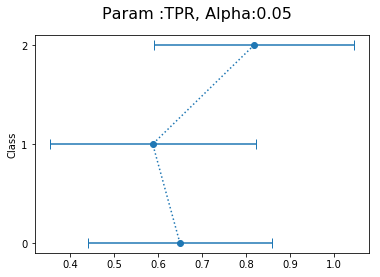

In [4]:
plot_ci(cm,param="TPR",method="normal-approx")

95%CI :
0 : (0.43285051021946463, 0.8188104521320554)
1 : (0.36005074385515545, 0.7838921396086862)
2 : (0.5230138624217553, 0.9486333993289995)


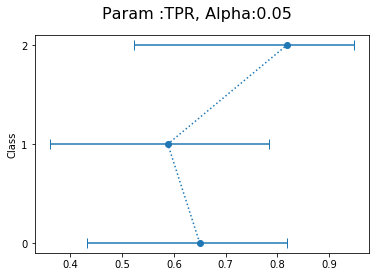

In [5]:
plot_ci(cm,param="TPR",method="wilson")

95%CI :
0 : (0.4315849969359111, 0.8200759654156089)
1 : (0.3595423027276775, 0.7844005807361641)
2 : (0.5115131538244717, 0.9601341079262828)


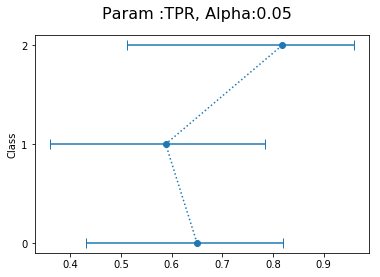

In [6]:
plot_ci(cm,param="TPR",method="agresti-coull")

## FPR

95%CI :
0 : (-0.0074215352310388755, 0.22170724951675308)
1 : (-0.021966229952848706, 0.15099848801736493)
2 : (0.1500197639598834, 0.44457483063471115)


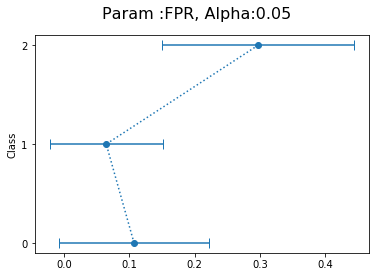

In [7]:
plot_ci(cm,param="FPR",method="normal-approx")

95%CI :
0 : (0.03711769205479948, 0.27196225367657073)
1 : (0.017874407775063175, 0.20718988318746445)
2 : (0.17489302346408198, 0.45783439172043583)


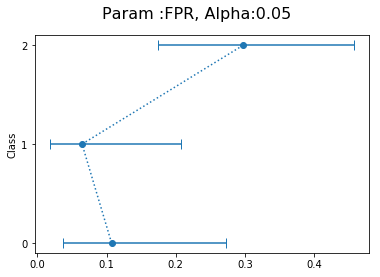

In [8]:
plot_ci(cm,param="FPR",method="wilson")

95%CI :
0 : (0.02898740902933511, 0.28009253670203504)
1 : (0.0075968375750390255, 0.21746745338748863)
2 : (0.1737338065288983, 0.4589936086556194)


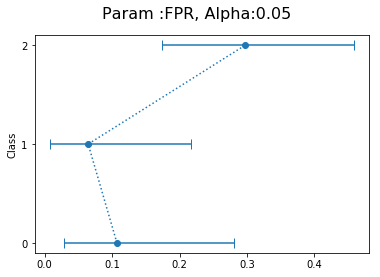

In [9]:
plot_ci(cm,param="FPR",method="agresti-coull")

## AUC

95%CI :
0 : (0.6399211771547619, 0.902935965702381)
1 : (0.6273084086303518, 0.8964107564550372)
2 : (0.6151497954659743, 0.9057347254185467)


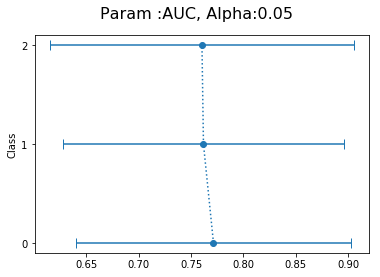

In [10]:
plot_ci(cm,param="AUC")

## PLR

95%CI :
0 : (1.986202987452899, 18.530051901514057)
1 : (2.2523561191462638, 36.90867850896665)
2 : (1.5589394210441203, 4.858346516200761)


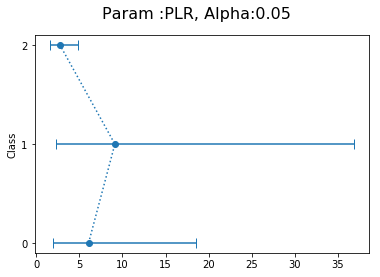

In [11]:
plot_ci(cm,param="PLR")

## Overall ACC

95%CI :
(0.5333055584484714, 0.8000277748848619)


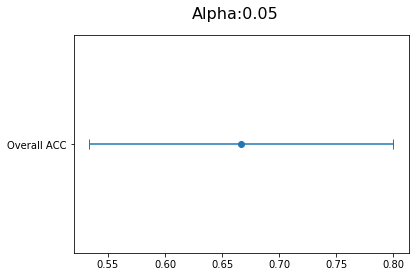

In [12]:
plot_ci(cm,param="Overall ACC")

## Kappa

95%CI :
(0.31072820940081924, 0.7046564059837961)


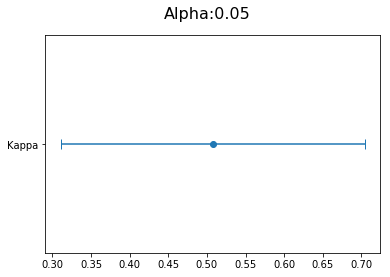

In [13]:
plot_ci(cm,param="Kappa")